In [1]:
import numpy as np
import pandas as pd

In [2]:
Random_State = 42
np.random.seed(Random_State)

In [3]:
n_samples = 5000

In [4]:
age = np.random.randint(21, 65, n_samples)
annual_income = np.random.normal(800000, 300000, n_samples).clip(200000, None)
#.normal -> noraml(Gaussian) Distribution
# Mean -> Average Income = 8lakhs
# Standard Deviation -> Income will typically vary by about 3 lakhs (above/below)
employment_years = np.random.randint(0, 40, n_samples)
credit_score = np.random.normal(680, 60, n_samples).clip(300, 900)
existing_loans = np.random.poisson(2, n_samples)
debt_to_income = np.random.uniform(0.1, 0.8, n_samples)
loan_amount = np.random.normal(500000, 250000, n_samples).clip(50000, None)
interest_rate = np.random.uniform(8, 24, n_samples)
loan_tenure_months = np.random.choice([12, 24, 36, 48, 60], n_samples)

risk_score = (
    (900 - credit_score) * 0.4 +
    debt_to_income * 300 +
    existing_loans * 50 +
    (loan_amount / annual_income) * 200 +
    (interest_rate - 8) * 10
)

default_probability = 1 / (1 + np.exp(-risk_score / 200))
default = np.random.binomial(1, default_probability)
# Bernoulli Trial when n=1
    # Return 1 -> default occurred / 0 -> no default

data = pd.DataFrame({
    "age": age,
    "annual_income": annual_income,
    "employment_years": employment_years,
    "credit_score": credit_score,
    "existing_loans": existing_loans,
    "debt_to_income": debt_to_income,
    "loan_amount": loan_amount,
    "interest_rate": interest_rate,
    "loan_tenure_months": loan_tenure_months,
    "default": default
})

data.head()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.696604e+05,7,709.460237,4,0.747930,246709.974845,23.047913,60,1
1,49,4.828002e+05,26,699.789384,4,0.460381,588472.735054,20.596041,36,1
2,35,6.703629e+05,14,676.293436,4,0.436770,355519.892644,19.768616,60,1
3,63,1.269386e+06,12,689.805669,4,0.797273,911677.761702,22.214834,12,1
4,28,7.259748e+05,15,644.163264,1,0.368751,779753.497258,20.316479,12,1


In [5]:
noisy_data = data.copy()

#### Noise 1: Gaussian Feature noise

In [6]:
income_noise = np.random.normal(0, 50000, size = len(noisy_data))
noisy_data["annual_income"] += income_noise
credit_score_noise = np.random.normal(0, 25, size = len(noisy_data))
noisy_data["credit_score"] += credit_score_noise

#### Injecting Missing values

In [7]:
missing_rate = 0.1
for column in ["employment_years", "annual_income"]:
    missing_indices = noisy_data.sample(frac=missing_rate, random_state=Random_State).index
    noisy_data.loc[missing_indices, column] = np.nan
     
     

#### Outliers

In [8]:
outliers_rate = 0.02
outliers_count = int(outliers_rate * len(noisy_data))
outliers_indeces = np.random.choice(noisy_data.index, outliers_count, replace=False)
noisy_data.loc[outliers_indeces, "loan_amount"] *= 3

In [9]:
# noisy_data.info()
noisy_data.head()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.227451e+05,7.0,686.560532,4,0.747930,246709.974845,23.047913,60,1
1,49,4.483824e+05,26.0,725.350117,4,0.460381,588472.735054,20.596041,36,1
2,35,5.954324e+05,14.0,654.883870,4,0.436770,355519.892644,19.768616,60,1
3,63,1.250412e+06,12.0,714.100186,4,0.797273,911677.761702,22.214834,12,1
4,28,6.342550e+05,15.0,670.999150,1,0.368751,779753.497258,20.316479,12,1


#### Data Exploration

##### 1. Basic Structural Check

In [10]:
noisy_data.shape

(5000, 10)

In [11]:
noisy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int32  
 1   annual_income       4500 non-null   float64
 2   employment_years    4500 non-null   float64
 3   credit_score        5000 non-null   float64
 4   existing_loans      5000 non-null   int32  
 5   debt_to_income      5000 non-null   float64
 6   loan_amount         5000 non-null   float64
 7   interest_rate       5000 non-null   float64
 8   loan_tenure_months  5000 non-null   int64  
 9   default             5000 non-null   int32  
dtypes: float64(6), int32(3), int64(1)
memory usage: 332.2 KB


In [12]:
# noisy_data.describe()
noisy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,42.575000,12.554597,21.000000,32.000000,43.000000,5.300000e+01,6.400000e+01
annual_income,4500.0,803718.975465,295732.368053,58686.413013,596670.906798,797569.749193,1.007226e+06,1.933657e+06
employment_years,4500.0,19.348000,11.485207,0.000000,9.000000,19.000000,2.900000e+01,3.900000e+01
credit_score,5000.0,680.444263,65.215125,456.443537,636.639493,680.884791,7.228299e+02,9.533301e+02
existing_loans,5000.0,1.993800,1.416108,0.000000,1.000000,2.000000,3.000000e+00,9.000000e+00
debt_to_income,5000.0,0.449900,0.203016,0.100126,0.275757,0.449444,6.259534e-01,7.994881e-01
loan_amount,5000.0,521393.336809,302707.032370,50000.000000,328579.111033,496580.862110,6.702531e+05,3.592674e+06
interest_rate,5000.0,16.001614,4.624248,8.001675,11.966318,16.059288,1.996754e+01,2.399931e+01
loan_tenure_months,5000.0,35.796000,16.978670,12.000000,24.000000,36.000000,4.800000e+01,6.000000e+01
default,5000.0,0.923400,0.265982,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


In [13]:
noisy_data.isnull().mean() * 100

age                    0.0
annual_income         10.0
employment_years      10.0
credit_score           0.0
existing_loans         0.0
debt_to_income         0.0
loan_amount            0.0
interest_rate          0.0
loan_tenure_months     0.0
default                0.0
dtype: float64

In [14]:
noisy_data["default"].value_counts(normalize=True)

default
1    0.9234
0    0.0766
Name: proportion, dtype: float64

##### 2. using visuals

In [15]:
import matplotlib.pyplot as plt

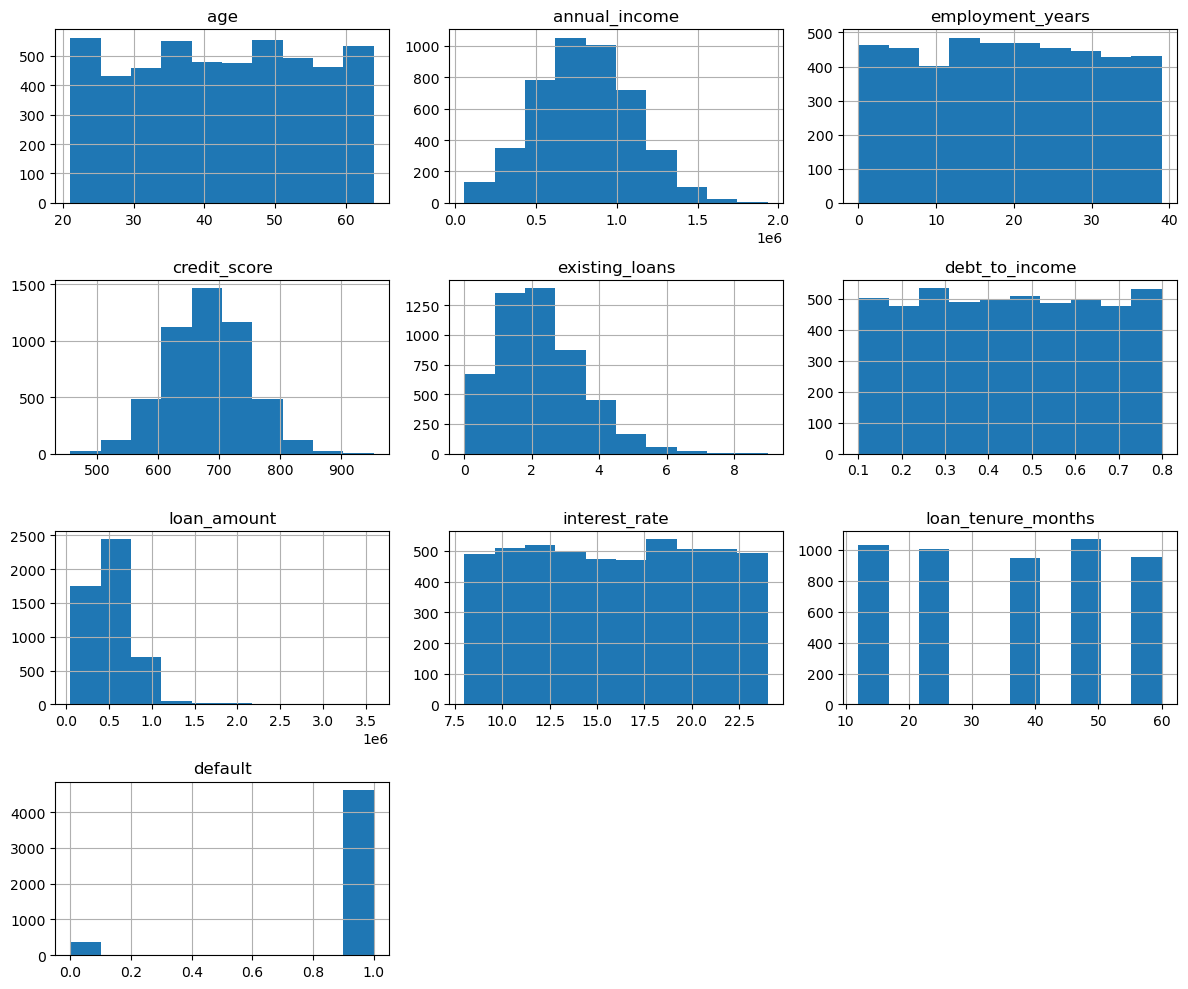

In [16]:
noisy_data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

##### Outliers IQR

In [17]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [18]:
detect_outliers_iqr(noisy_data, "loan_amount").shape

(79, 10)

In [19]:
detect_outliers_iqr(noisy_data, "annual_income").shape

(13, 10)

##### feature comparision

In [20]:
noisy_data.groupby("default")["credit_score"].mean()

default
0    691.615920
1    679.517526
Name: credit_score, dtype: float64

In [21]:
noisy_data.groupby("default")["debt_to_income"].mean()

default
0    0.383818
1    0.455382
Name: debt_to_income, dtype: float64

In [22]:
import seaborn as sns

<Axes: >

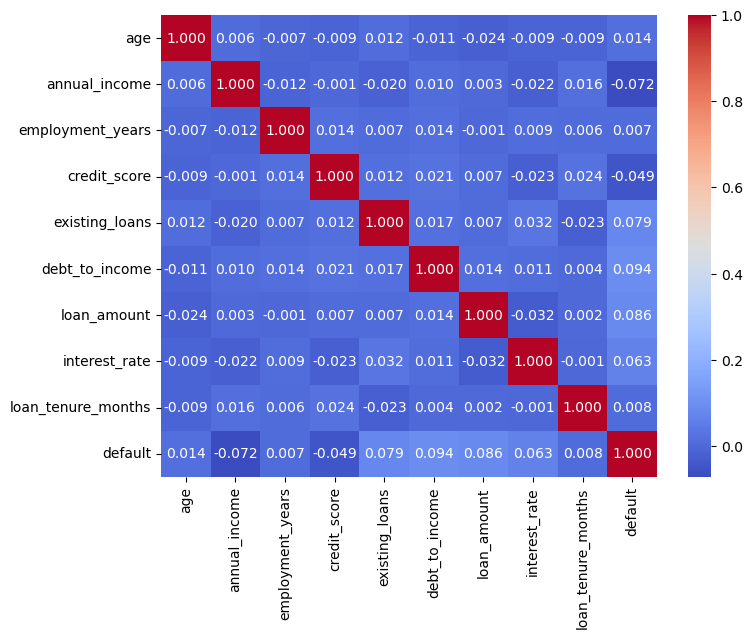

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(noisy_data.corr(), annot=True, fmt=".3f", cmap="coolwarm")

##### Fil Null Values

In [24]:
noisy_data["annual_income"].fillna(noisy_data["annual_income"].mean(), inplace=True)
noisy_data["employment_years"].fillna(noisy_data["employment_years"].median(), inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11612\3616584275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["annual_income"].fillna(noisy_data["annual_income"].mean(), inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_11612\3616584275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [25]:
noisy_data.isnull().sum()

age                   0
annual_income         0
employment_years      0
credit_score          0
existing_loans        0
debt_to_income        0
loan_amount           0
interest_rate         0
loan_tenure_months    0
default               0
dtype: int64

##### Handling Outliers

In [26]:
loan_cap = noisy_data["loan_amount"].quantile(0.99)
noisy_data["loan_amount"].clip(upper=loan_cap, inplace=True)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11612\3611313666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["loan_amount"].clip(upper=loan_cap, inplace=True)
